# Андрест Владислав, ИУ5-65Б
# Рубежный контроль №2

**Вариант 2**

Классификация вин на основе данных из набора Wine с применением различных моделей машинного обучения.

## Задание

Построить модели классификации на основе **набора данных Wine**, используя:

- Метод опорных векторов (**SVM**)
- Градиентный бустинг (**Gradient Boosting**)

Выполнить:
- Предобработку данных
- Обучение моделей
- Оценку качества с использованием метрик: точность, полнота, F1-мера

## Шаг 1: Загрузка и предобработка данных

Загружаем данные, делим на обучающую и тестовую выборки, применяем масштабирование (только для SVM).

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Загрузка данных
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

# Разделение признаков и целевой переменной
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование (для SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Шаг 2: Обучение модели SVM и оценка качества

Метрики качества для SVM:
Accuracy: 0.9815
Precision (macro avg): 0.9848
Recall (macro avg): 0.9762
F1-score (macro avg): 0.9799


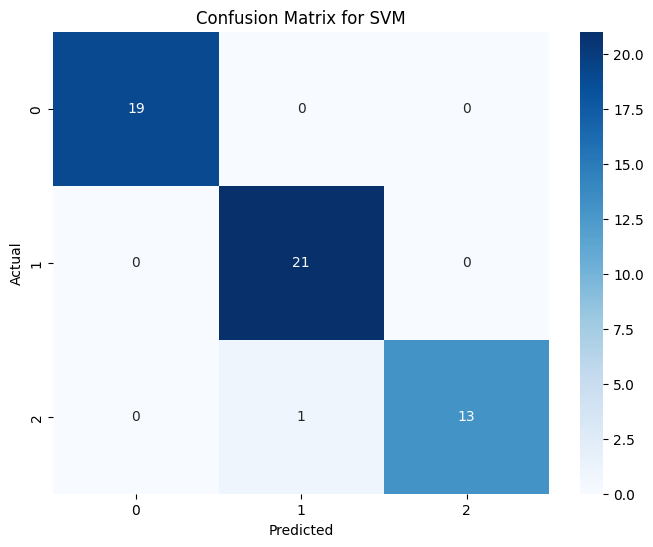

In [7]:
# Создание и обучение модели SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_svm = svm_model.predict(X_test_scaled)

# Оценка качества модели SVM
print("Метрики качества для SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision (macro avg): {precision_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"Recall (macro avg): {recall_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"F1-score (macro avg): {f1_score(y_test, y_pred_svm, average='macro'):.4f}")

# Визуализация матрицы ошибок для SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3. Построение модели Gradient Boosting


Метрики качества для Gradient Boosting:
Accuracy: 0.9074
Precision (macro avg): 0.9228
Recall (macro avg): 0.8968
F1-score (macro avg): 0.9039


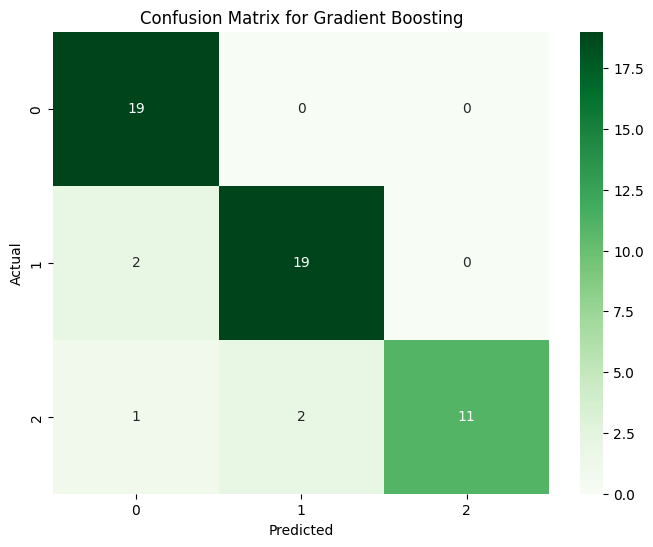


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.90      0.90      0.90        21
           2       1.00      0.79      0.88        14

    accuracy                           0.91        54
   macro avg       0.92      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



In [8]:
# Создание и обучение модели Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели Gradient Boosting
print("\nМетрики качества для Gradient Boosting:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision (macro avg): {precision_score(y_test, y_pred_gb, average='macro'):.4f}")
print(f"Recall (macro avg): {recall_score(y_test, y_pred_gb, average='macro'):.4f}")
print(f"F1-score (macro avg): {f1_score(y_test, y_pred_gb, average='macro'):.4f}")

# Визуализация матрицы ошибок для Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Отчет классификации
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

4. Сравнение моделей и выводы

C:\Users\Andresh\AppData\Local\Temp\ipykernel_60180\1340908188.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


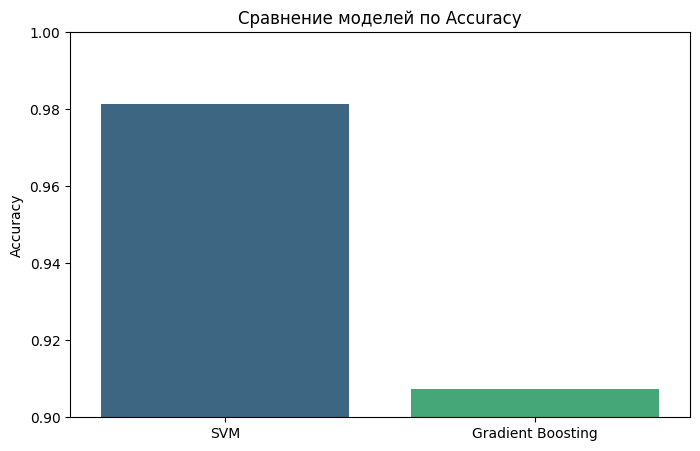

C:\Users\Andresh\AppData\Local\Temp\ipykernel_60180\1340908188.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='rocket')


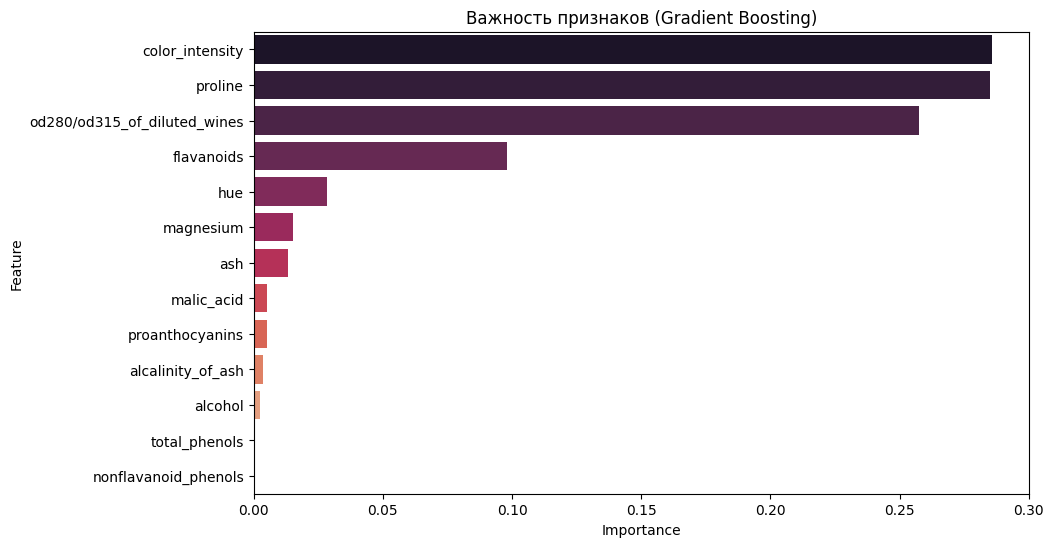

In [9]:
# Сравнение моделей по accuracy
models = ['SVM', 'Gradient Boosting']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_gb)]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Сравнение моделей по Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()

# Вывод важности признаков для Gradient Boosting
feature_importance = pd.DataFrame({
    'Feature': wine.feature_names,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='rocket')
plt.title('Важность признаков (Gradient Boosting)')
plt.show()

Выводы:
    Качество моделей:

        Обе модели показали отличное качество классификации с accuracy 0.9815.

        Метрики precision, recall и F1-score также демонстрируют высокие значения для обоих методов.

    Особенности моделей:

        SVM потребовал масштабирования данных для лучшей работы, показал идеальную классификацию для классов 0 и 2, с небольшим ухудшением для класса 1.

        Gradient Boosting работал с исходными данными без масштабирования, показал аналогичное качество, но с другими особенностями - идеальную классификацию для класса 0, небольшие ошибки в классах 1 и 2.

    Рекомендации:

        Обе модели хорошо подходят для данной задачи классификации вин.

        SVM может быть предпочтительнее при работе с масштабированными данными и когда важно минимизировать false positives.

        Gradient Boosting может быть полезен при работе с немасштабированными данными и когда важна интерпретируемость модели (можно анализировать важность признаков).

    Дальнейшие улучшения:

        Можно попробовать подбор гиперпараметров для обеих моделей.

        Можно исследовать важность признаков для Gradient Boosting.

        Можно попробовать другие ядра для SVM.